###Exploratory Data Analysis: Haberman's Survival Data


###Relevant informations
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

It contains :-

1. 305 datapoints/rows
2. 4 fearures includeing class label

###Attributes/Features Information
There are 4 features including class label/dependent variable.

30 - It represents age of patient at the time of operation(numerical)

64 - It represents year of operation(numerical)

1 - It tells no of +ve auxillry node detected(numerical)

1.1 - Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

###Objective
To classify/predict a patient survival who had undergone surgery for breast cancer.

In [1]:
import pandas as pd # Data analysis and manipulation
import numpy as np # Numerical operations

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To load the data into DataFrame(It is 2d mutable, heterogeneous tabular data structure with labeled axes)

df = pd.read_csv("haberman.csv")
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
# To know number of features/columns.

df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [4]:
# Number of rows(data-points) and columns(features).

df.shape

(305, 4)

In [5]:
# To rename the column name for better understanding
# Both of the ways we can rename the columns name

#df.columns = ["age", "operation_year", "axillary_lymph_node", "survival_status"]

#or

df = df.rename(columns = {"30" : "age", "64" : "operation_year", "1" : "axillary_lymph_node", "1.1" : "survival_status"})

In [6]:
# It gives you the top 5 rows(data-points).

df.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [7]:
# To look at the last 5 rows(data-points), we can also specify that how many data-points we want to see.

df.tail(7)

,age,operation_year,axillary_lymph_node,survival_status
298,74,65,3,2
299,74,63,0,1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [8]:
# To know about data summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  305 non-null    int64
 1   operation_year       305 non-null    int64
 2   axillary_lymph_node  305 non-null    int64
 3   survival_status      305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
# To know statistical summary of data which is very important

df.describe()

,age,operation_year,axillary_lymph_node,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
# To know number of data-points for each class.
# As it is not balanced dataset, it is imbalanced dataset because the number of data-points for both of the class are significantly different.
# we will see how to handle imbalanced data later

df.survival_status.value_counts()

1    224
2     81
Name: survival_status, dtype: int64

##Univariate Analysis(pdf, cdf, boxplot and violin plot)
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so, in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

##PDF(Probability Density Function)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


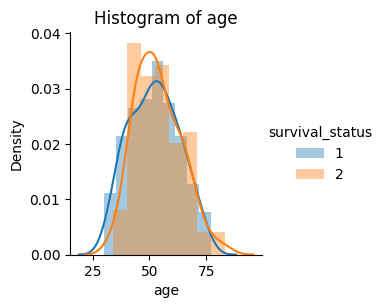

In [12]:
# Here, we are using age feature to generate pdf()
# pdf(smoothed form of histogram)
# pdf basically shows, how many of points lies in some interval

sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "age").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


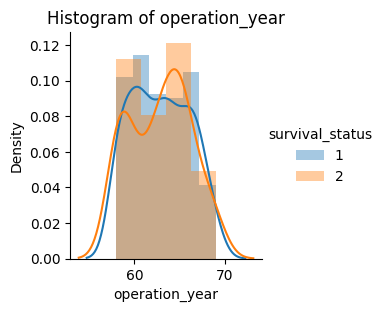

In [13]:
sns.FacetGrid(df, hue = "survival_status"). map(sns.distplot, "operation_year").add_legend()
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


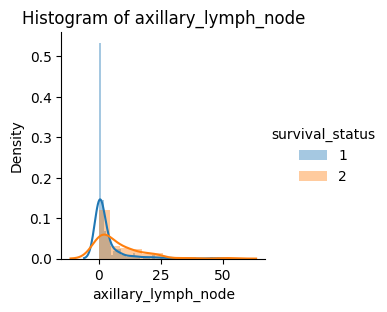

In [15]:
sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "axillary_lymph_node").add_legend()
plt.title("Histogram of axillary_lymph_node")
plt.ylabel("Density")
plt.show()

####observations

1. In all the plots the features are overlapping each other massively. But somehow we can say
2. probabily 58% people survived who had 0-5 axlillary_lymph_node and 12% died as well.

##CDF(Cummulative Distributed Function)

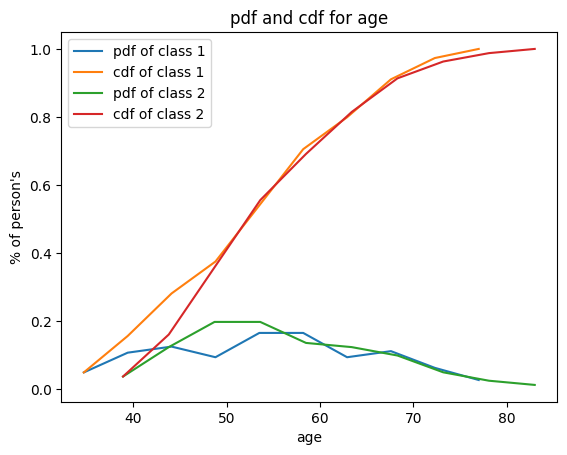

In [16]:
# one = df.loc[df["survival_status"] == 1]
# two = df.loc[df["survival_status"] == 2]
# cdf gives you cummulative probability associated with a function
# Cumulative sum of area under curve upto gives you cdf
# Here, Class 1 means survived
# Class 2 means not survived
one = df.loc[df["survival_status"] == 1]
two = df.loc[df["survival_status"] == 2]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()


# 53-58

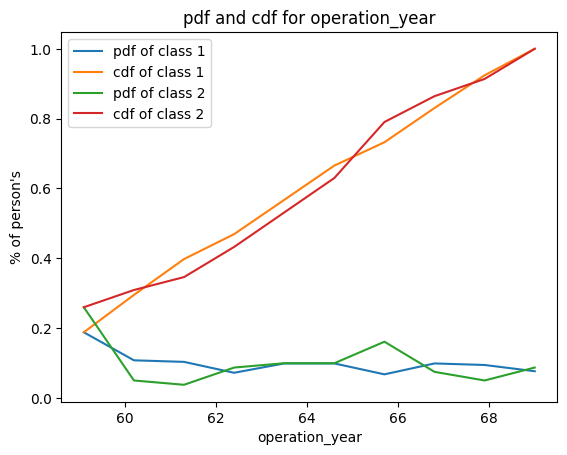

In [17]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(two["operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for operation_year")
plt.xlabel("operation_year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show();

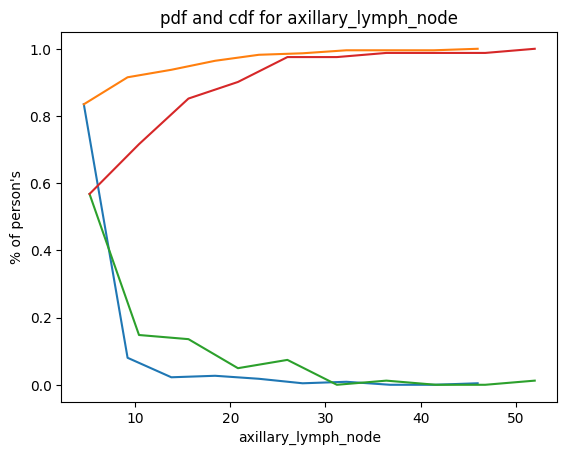

In [18]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["axillary_lymph_node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["axillary_lymph_node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for axillary_lymph_node")
plt.xlabel("axillary_lymph_node")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

####Observations

1. 15% of the person's have less than or equal to age 37 who survived.
2. Perosons' who has more than 46 auxillary_lymph_node not survived.

###Box Plot

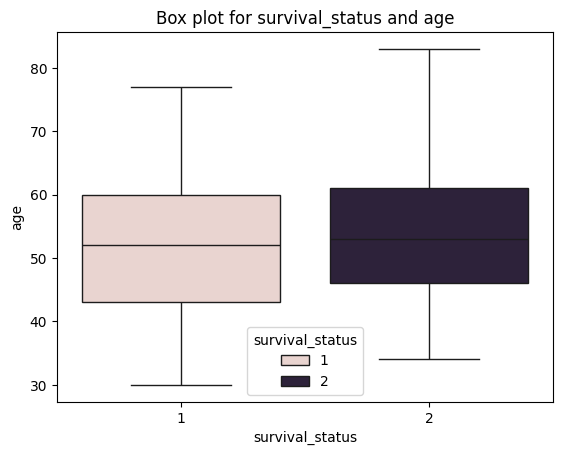

In [19]:
# boxplot gives you the statistical summery of data
# Rectangle represent the 2nd and 3rd quartile (horizontal line either side of the rectangle)
# The horizontal line inside box represents median
# We can add title in box plot using either way
# plt.title("Box plot for survival_status and age") or set_title("")

sns.boxplot(x = "survival_status", y = "age", hue = "survival_status", data = df).set_title("Box plot for survival_status and age")
plt.show()

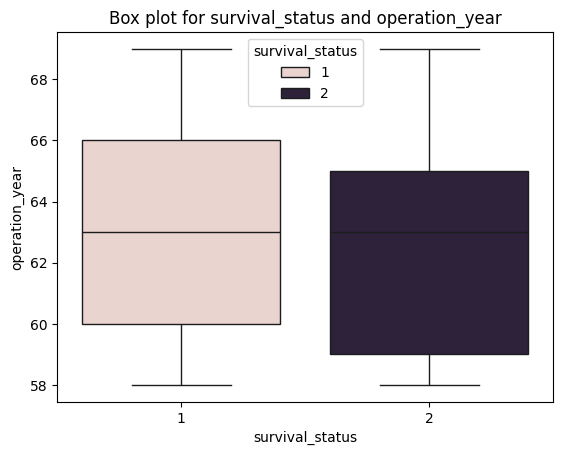

In [20]:
sns.boxplot(x = "survival_status", y = "operation_year", hue = "survival_status", data = df).set_title("Box plot for survival_status and operation_year")
plt.show()

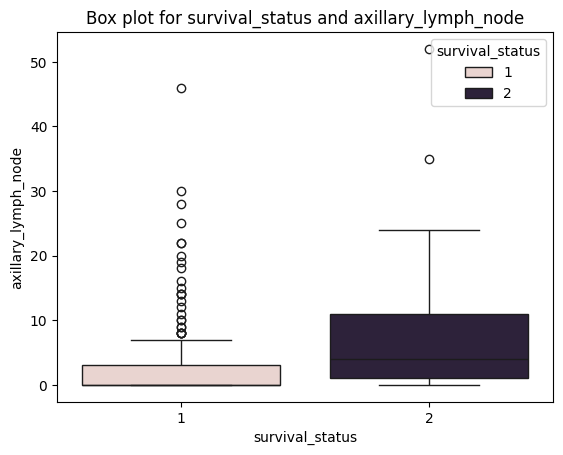

In [21]:
sns.boxplot(x = "survival_status", y = "axillary_lymph_node", hue = "survival_status", data = df).set_title("Box plot for survival_status and axillary_lymph_node")
plt.show()

###Violin Plot

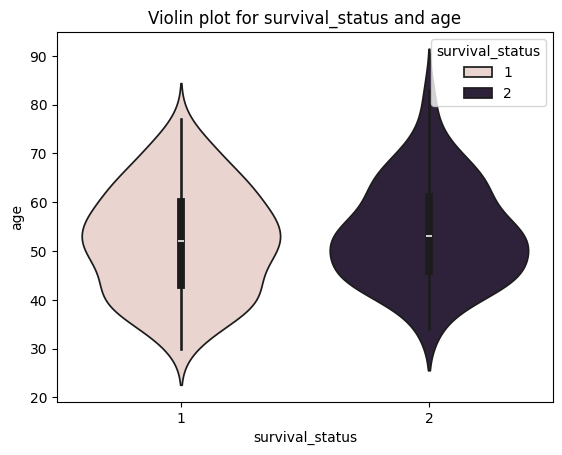

In [22]:
# The violin plot shows the full distribution of the data.
# It is combination of box plot and histogram
# central dot represents median

sns.violinplot(x = "survival_status", y = "age", hue = "survival_status", data = df)
plt.title("Violin plot for survival_status and age")
plt.show()

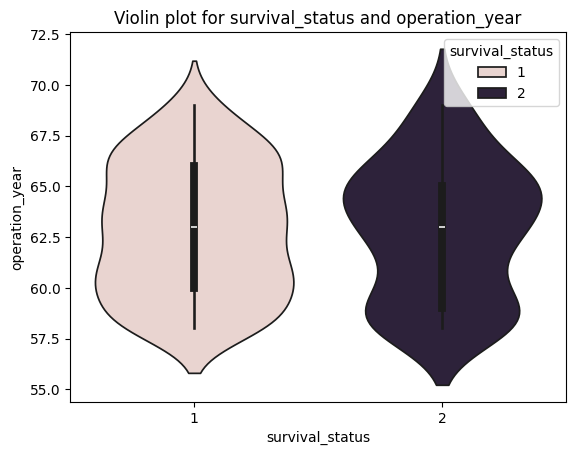

In [23]:
sns.violinplot(x = "survival_status", y = "operation_year", hue = "survival_status", data = df)
plt.title("Violin plot for survival_status and operation_year")
plt.show()

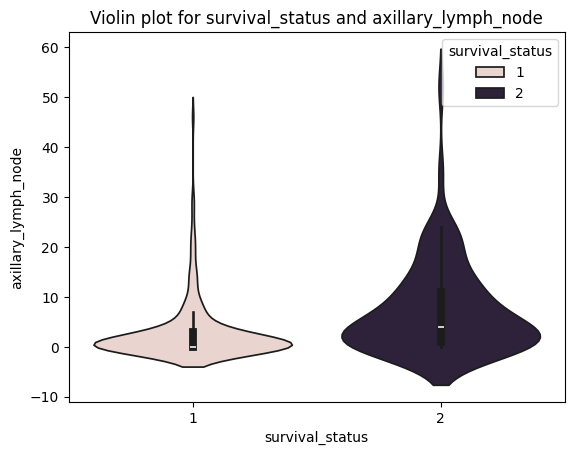

In [24]:
sns.violinplot(x = "survival_status", y = "axillary_lymph_node", hue = "survival_status", data = df)
plt.title("Violin plot for survival_status and axillary_lymph_node")
plt.show()

###Bivariate Analysis
Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them

##Scatter Plot
A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

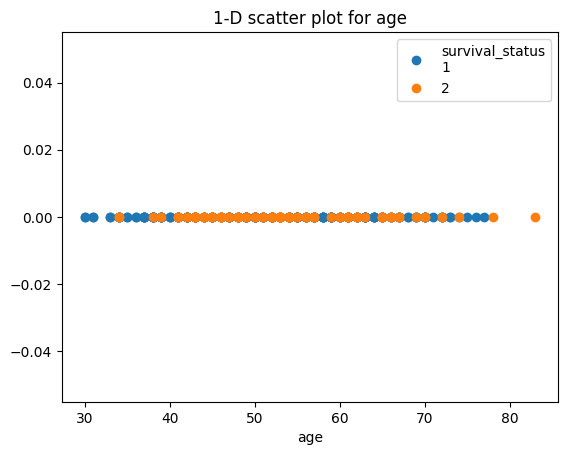

In [25]:
# 1-d scatter plot

one = df.loc[df["survival_status"] == 1]
two = df.loc[df["survival_status"] == 2]
plt.plot(one["age"], np.zeros_like(one["age"]), 'o', label = "survival_status\n" "1")
plt.plot(two["age"], np.zeros_like(two["age"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()

observations

1. After looking at this plot we can easily count number of points that are there in age range who survived or not.
2. Many person died whose age was between 41-70.

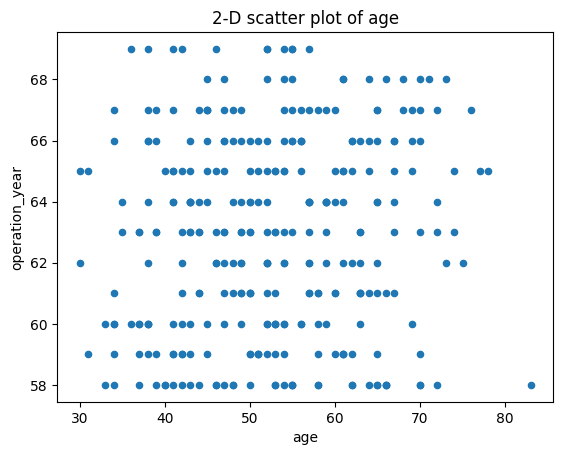

In [26]:
# 2-d scatter plot

df.plot(kind = "scatter", x = "age", y = "operation_year")
plt.title("2-D scatter plot of age")
plt.show()

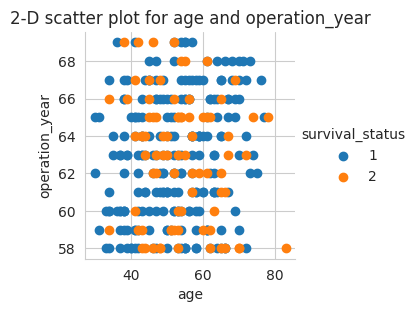

In [28]:
# 2d scatter plot with color coding for each class

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status").map(plt.scatter, "age", "operation_year").add_legend()
plt.title("2-D scatter plot for age and operation_year")
plt.show()


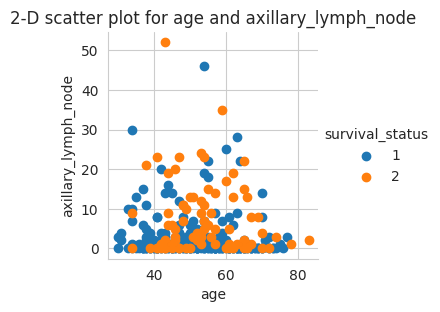

In [29]:
# 2d scatter plot

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status").map(plt.scatter, "age", "axillary_lymph_node").add_legend()
plt.title("2-D scatter plot for age and axillary_lymph_node")
plt.show()

####observations

In the above 2d scatter plot class label(i.e. a person died or survived) is not linearly seprable
0-5 axillary_lymph_node person survived and died as well but the died ratio is less than survive ratio.

###Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


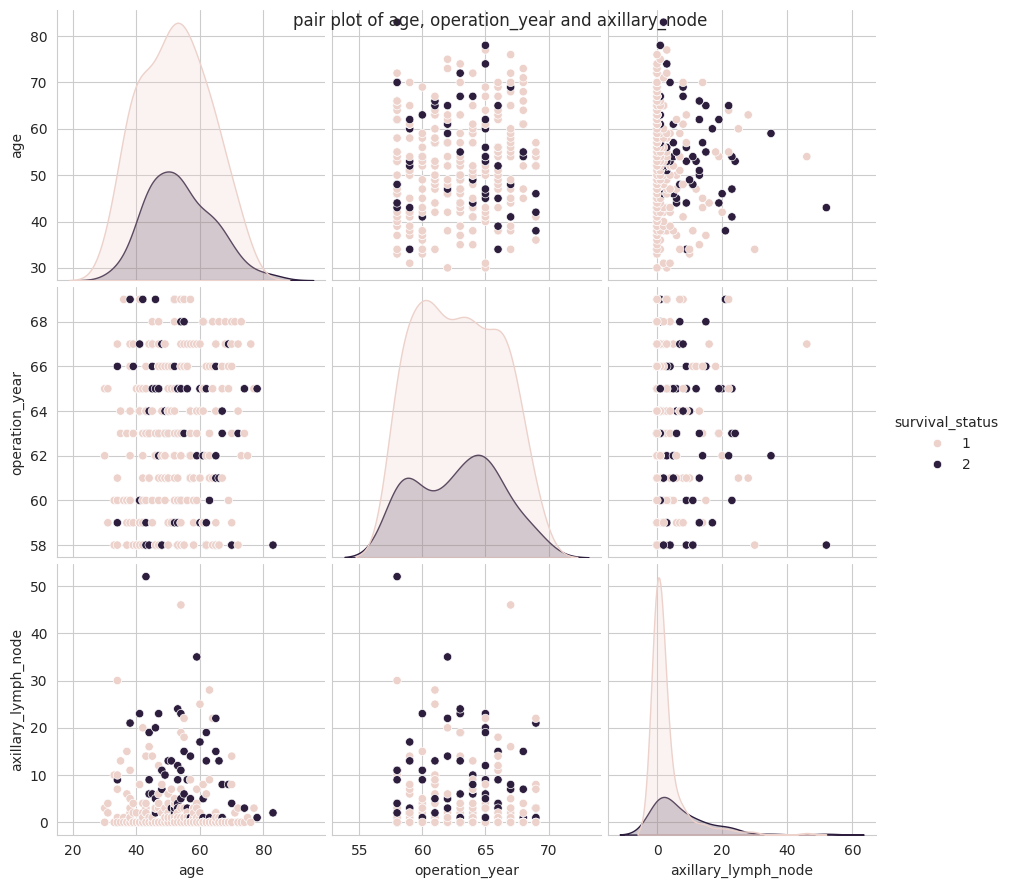

In [30]:
#Here, we are generating pairplot based on survival_status
#We use pair plot where the dimenstionality of data is less.
#In our case we have only 4 dimension data. So, we can use pairplot.

sns.set_style("whitegrid")
sns.pairplot(df, hue = "survival_status", vars = ["age", "operation_year", "axillary_lymph_node"], size = 3)
plt.suptitle("pair plot of age, operation_year and axillary_node")
plt.show()

####Observation

1. As we are unable to classify which is the most useful feature because of too much overlapping. But, Somehow we can say, In operation_year, 60-65 more person died who has less than 6 axillary_lymph_node.
2. And hence, this plot is not much informative in this case.

###Conclusion

* The given dataset is imbalanced as it does not an contains euqal number of
data points for each class.
* The given dataset is not linearly separable form each class. There are too much overlapping in the data points and hence it is very difficult to classify.
* somehow axillary_lymph_node is giving some intution in the dataset.
* we can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.